# Thoughts on the two sigma factor projects

## Discretized general sigma factor model

### Model definition

This is the initial model which doesn't involve lifetime($\tau$) and max. expression rate ($\beta$), etc. This is for non-Gillespie, though the Gillespie version is not too much different

In [1]:
using Catalyst, Plots, StochasticDiffEq, DiffEqJump, Latexify

duo_input_hill(X, Y, S, D, n) = 
    (S * X)^n / ((S * X)^n + (D * Y)^n + 1)

sigma_model = @reaction_network begin
    v₀, ∅ --> σ
    duo_input_hill(σ, A, S, D, n), ∅ --> σ
    1.0, σ --> ∅
    1/τ * σ, ∅ --> A
    1/τ, A --> ∅
end v₀ S D n τ η

latexify(convert(ODESystem, sigma_model))

L"\begin{align}
\frac{d\sigma(t)}{dt} =& v{_0} -1 \sigma\left( t \right) + \left( 1 + \left( D A\left( t \right) \right)^{n} + \left( S \sigma\left( t \right) \right)^{n} \right)^{-1} \left( S \sigma\left( t \right) \right)^{n} \\
\frac{dA(t)}{dt} =& \sigma\left( t \right) \tau^{-1} -1 A\left( t \right) \tau^{-1}
\end{align}
"

### Simulation

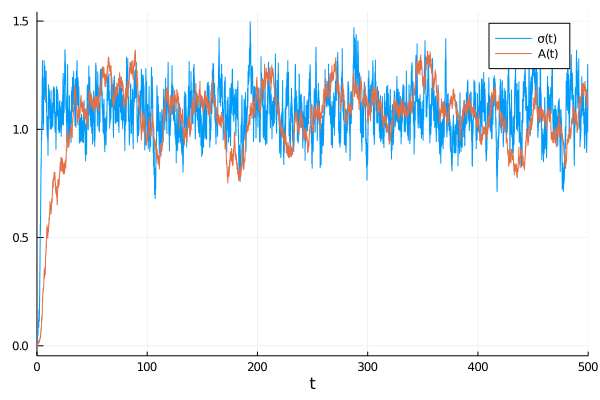

In [2]:
using DifferentialEquations

p = (0.1, 5., 1., 3., 10., .1)    # v₀ S D n τ η
tspan = (0., 500.)
u₀ = [0., 0.]  # σ A

# CLE
sprob = SDEProblem(sigma_model, u₀, tspan, p, noise_scaling = (@variables η)[1])
oprob = ODEProblem(sigma_model, u₀, tspan, p)
sol = solve(sprob, EM(), dt = 1e-2)
#sol = solve(oprob, Tsit5())
plot(sol)

### Model definitaion for Gillespie

In [4]:
sigma_model_d = @reaction_network begin
    v₀, ∅ --> σ
    β * duo_input_hill(σ, A, S, D, n), ∅ --> σ
    1.0, σ --> ∅
    1/τ * σ, ∅ --> A
    1/τ, A --> ∅
end v₀ β S D n τ

latexify(convert(ODESystem, sigma_model_d))

L"\begin{align}
\frac{d\sigma(t)}{dt} =& v{_0} -1 \sigma\left( t \right) + \beta \left( 1 + \left( D A\left( t \right) \right)^{n} + \left( S \sigma\left( t \right) \right)^{n} \right)^{-1} \left( S \sigma\left( t \right) \right)^{n} \\
\frac{dA(t)}{dt} =& \sigma\left( t \right) \tau^{-1} -1 A\left( t \right) \tau^{-1}
\end{align}
"

### Simulation

In [5]:
p = (0.1, 100., 5., 5., 3., 10.,)    # v₀ S D n τ η
tspan = (0., 500.)
u₀ = [10, 0]  # σ A

# SSA
dprob = DiscreteProblem(sigma_model_d, u₀, tspan, p)
jprob = JumpProblem(sigma_model_d, dprob, Direct())
jsol = solve(jprob, SSAStepper())
plot(jsol)